In [1]:
import matplotlib.pyplot as plt
from matplotlib import collections, patches, cm
import numpy as np
import seaborn
import operator

/home/maljovec/miniconda3/envs/research/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
x = np.loadtxt('points.txt')
edges = np.loadtxt('edges.txt', dtype=int)
output = np.loadtxt('output.txt', dtype=int)
probabilities = np.loadtxt('probabilities.txt')

py_output = np.loadtxt('py_output.txt', dtype=int)
py_probabilities = np.loadtxt('py_probabilities.txt')

1 0 0.076
1 1 0.0
1 2 0.092
1 3 1.0
1 4 0.159
1 5 0.066
1 6 0.066
1 7 0.051
1 8 1.0
1 9 0.059


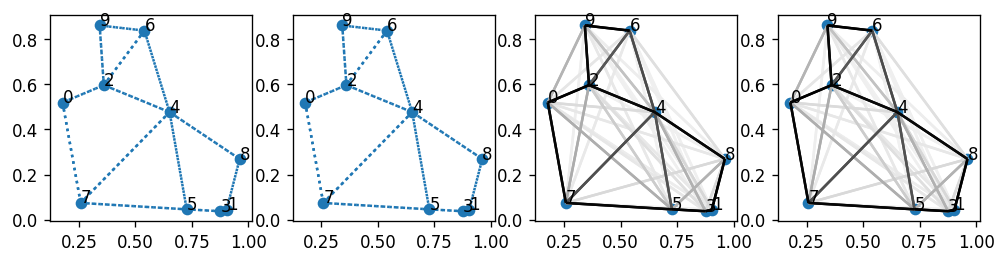

In [3]:
figs, axs = plt.subplots(1,4, figsize=(10,10), dpi=120)
axs[0].scatter(x[:,0], x[:,1])
for i, pt in enumerate(x):
    axs[0].annotate(str(i), pt)

lines = []
colors = []
for row in range(len(x)):
    for col in edges[row]:
        if output[row, col] != -1:
            lines.append([(x[row, 0], x[row, 1]), (x[col, 0], x[col, 1])])
lc = collections.LineCollection(lines, linestyles=':', zorder=1, alpha=1)
axs[0].add_collection(lc)

axs[1].scatter(x[:,0], x[:,1])
for i, pt in enumerate(x):
    axs[1].annotate(str(i), pt)

lines = []
colors = []
for row in range(len(x)):
    for col in edges[row]:
        if py_output[row, col] != -1:
            lines.append([(x[row, 0], x[row, 1]), (x[col, 0], x[col, 1])])
lc = collections.LineCollection(lines, linestyles=':', zorder=1, alpha=1)
axs[1].add_collection(lc)

axs[2].scatter(x[:,0], x[:,1])
for i, pt in enumerate(x):
    axs[2].annotate(str(i), pt)

lines = []
colors = []
for row in range(len(x)):
    for col in edges[row]:
        lines.append([(x[row, 0], x[row, 1]), (x[col, 0], x[col, 1])])
        colors.append(probabilities[row, col])
bundle = sorted(zip(lines, colors), key=operator.itemgetter(1) )
lines, colors = tuple(zip(*bundle))
lc = collections.LineCollection(lines, colors=cm.binary(colors), zorder=1, alpha=1)
axs[2].add_collection(lc)

axs[3].scatter(x[:,0], x[:,1])
for i, pt in enumerate(x):
    axs[3].annotate(str(i), pt)

lines = []
colors = []
for row in range(len(x)):
    for col in edges[row]:
        if row == 1:
            print(row, col, py_probabilities[row, col])
        lines.append([(x[row, 0], x[row, 1]), (x[col, 0], x[col, 1])])
        colors.append(py_probabilities[row, col])

bundle = sorted(zip(lines, colors), key=operator.itemgetter(1) )
lines, colors = tuple(zip(*bundle))
lc = collections.LineCollection(lines, colors=cm.binary(colors), zorder=1, alpha=1)
axs[3].add_collection(lc)

for ax in axs:
    ax.set_aspect('equal')

plt.show()